In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./data/AEP_hourly.csv', parse_dates=[0],index_col=[0])

print(df.head())
print(df.info())



                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None


In [2]:
print(df.isnull().sum())
print(df.index.duplicated().sum())
print(df['AEP_MW'].describe())
print(df[df['AEP_MW']<0])

df = df.sort_index()
df = df[~df.index.duplicated(keep="first")]

AEP_MW    0
dtype: int64
4
count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64
Empty DataFrame
Columns: [AEP_MW]
Index: []


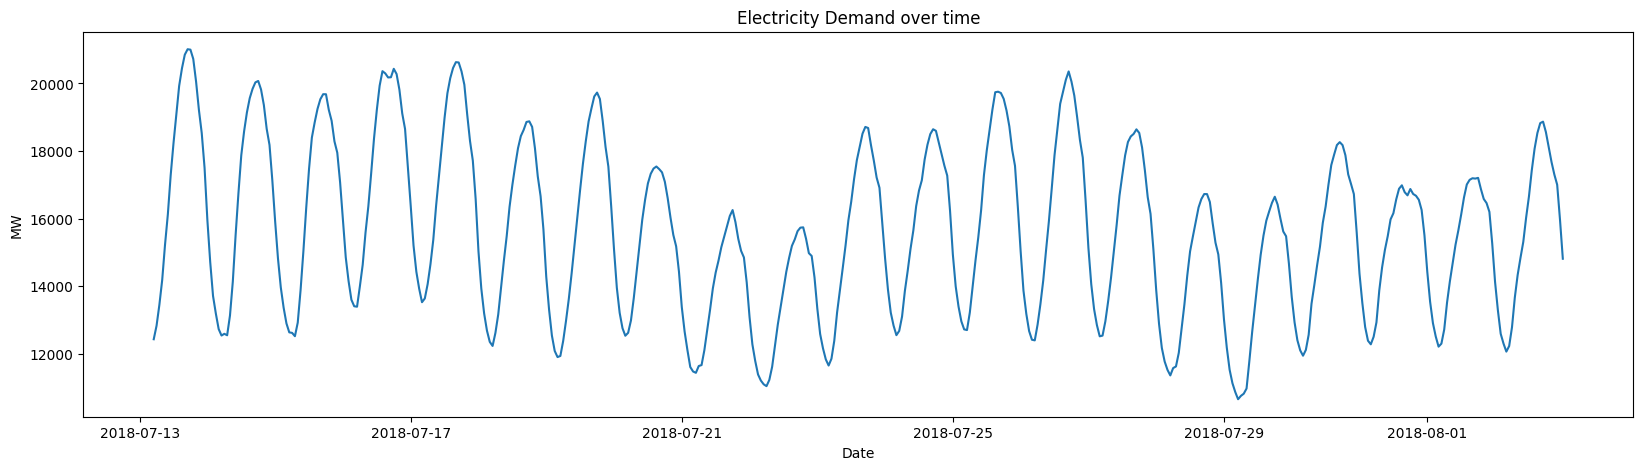

In [3]:
plt.figure(figsize=(20,5))
plt.plot(df.index[-500:],df["AEP_MW"][-500:])
plt.title("Electricity Demand over time")
plt.xlabel("Date")
plt.ylabel("MW")
plt.show()

In [4]:
df['Baseline'] = df['AEP_MW'].shift(24)
df = df.dropna()

In [5]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(df['AEP_MW'],df['Baseline'])
rmse = root_mean_squared_error(df['AEP_MW'],df['Baseline'])

print("Baseline MAE:", mae)
print("Baseline RMSE: ", rmse)

Baseline MAE: 967.1469751329952
Baseline RMSE:  1299.884993256968


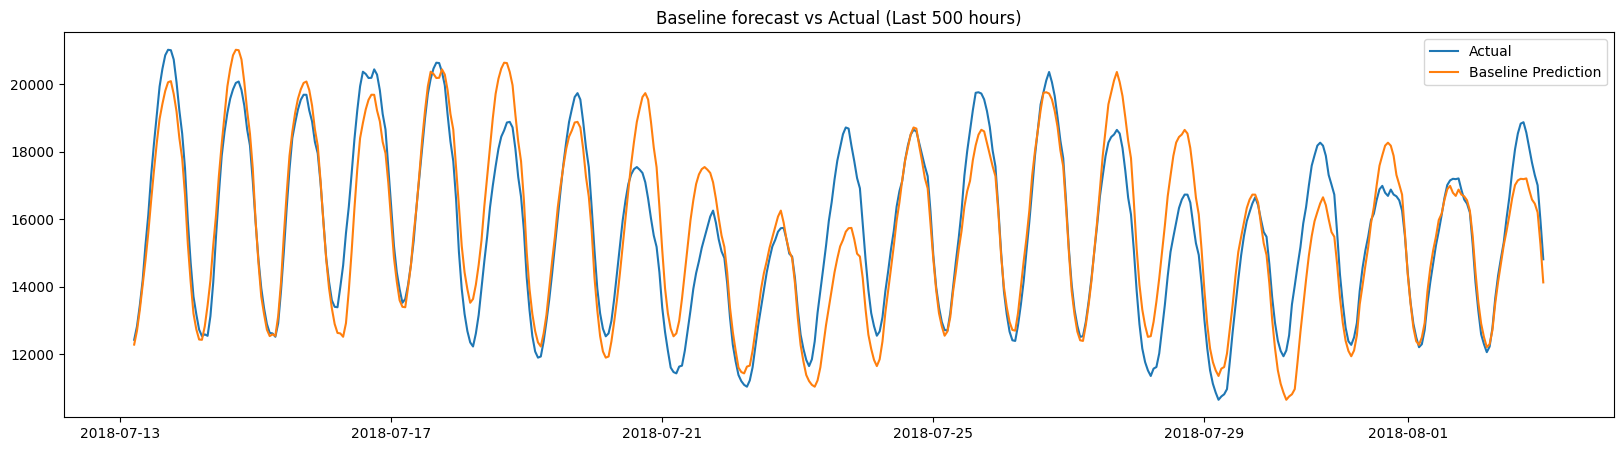

In [6]:
plt.figure(figsize=(20,5))
plt.plot(df.index[-500:], df['AEP_MW'][-500:],label="Actual")
plt.plot(df.index[-500:], df['Baseline'][-500:],label="Baseline Prediction")
plt.legend()
plt.title("Baseline forecast vs Actual (Last 500 hours)")
plt.show()


In [7]:
df.to_csv("./data/cleaned_AEP_hourly.csv")